### Applied Data Science Capstone - Week 3

## Segmenting and Clustering Neighborhoods in Toronto

<a id='table_of_contents'></a>

### Contents

#### Scrape Wiki Page for Toronto's Postal Codes

[Wikipedia Postal codes for Toronto](#Wikipedia_Postal_codes_for_Toronto)

[PostalCode-Borough-Neighborhood-Dataframe](#PostalCode-Borough-Neighborhood-Dataframe)

[Cleaned-Sorted-PostalCode-Dataframe](#Cleaned-Sorted-PostalCode-Dataframe)

[List of Postal Codes](#List_of_Postal_Codes)

#### Geocode

[Geocoding Postal Codes](#Geocoding_Postal_Codes)

[Neighborhood Latitude Longitude Table](#Latitude_Longitude_Table)

#### Additional Data for Toronto

[Open Toronto Neighbourhoods](#Open_Toronto_Neighbourhoods)

[Population Density Dataframe](#Population_Density_Dataframe)

[Neighborhoods geojson](#neighborhoods_geojson)

#### Explore Neighborhoods    Cluster Data    Maps

[Map Toronto Neighborhoods](#map_toronto_neigh)

[Population Density Choropleth Map](#population_density_choropleth_map)

[Foursquare Venue Explore TopPicks](#topPicks)

[Pickle](#pickle)

[Map of Top Picks Comparing Morning and Night](#map_topPicks)

[Foursquare Venue Search](#foursquare_venue_search)

[Map of All Starbucks](#Map_of_All_Starbucks)

[K-Means Clustering All Starbucks Data](#k-means_allStarbucks)

[Mapping All Starbucks K-Means Clusters & Population Density](#AllStarbucks_KMeans_popDensity)

In [ ]:
####  Tip for links:    [Link to the destination](#the_destination)  followed by   <a id='K-Means_Clustering'></a>

In [1]:
import requests
# http requests & response used with Foursquare API

import json # library to handle JSON files
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Foursquare results will be in JSON and then flattened and stored in a Pandas Dataframe

In [2]:
from bs4 import BeautifulSoup

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.

In [3]:
import numpy as np # library to handle data in a vectorized manner

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Geopy can calculate geodesic distance between two points using the geodesic distance or the great-circle distance, 
# with a default of the geodesic distance available as the function geopy.distance.distance.
from geopy.distance import geodesic
from geopy.distance import great_circle

import scipy
from scipy.spatial import distance


# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


# import k-means for clustering 
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
# folium should be version 0.11.0

print(folium.__version__)

0.11.0


In [5]:
import pgeocode

# pgeocode is a Python library for high performance off-line querying of GPS coordinates, region name and municipality
# name from postal codes. Distances between postal codes as well as general distance queries are also supported. 
# The used GeoNames database includes postal codes for 83 countries.
# Currently, only queries within the same country are supported.
# For additional documentation see pgeocode.readthedocs.io.

In [6]:
pgeocode.__version__

'0.2.1'

In [7]:
import geopandas as gpd
import geojson

In [8]:
# Wide Display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [9]:
# Files saved: 
# 'North_York_Starbucks_20200616b.pkl'
# 'Toronto_Downtown_Starbucks_20200616b.pkl'
# 'Toronto_Scarborough_Starbucks_20200616b.pkl'
# 'Toronto_West_York_Starbucks_20200616b.pkl'

# df.to_pickle(file_name)  # where to save it, usually as a .pkl
# df = pd.read_pickle(file_name)

### Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = '1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF' # your Foursquare ID
CLIENT_SECRET = '3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV' # your Foursquare Secret
VERSION = '20200514' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF
CLIENT_SECRET:3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV


In [11]:
# function that extracts the category of the venue from Foursquare results

def get_categories(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<a id='Wikipedia_Postal_codes_for_Toronto'></a>   

### Wikipedia page used to gather data that is in a table of postal codes and then transform the data into a pandas dataframe

In [13]:
# https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
# Metropolitan Toronto: M   102 Postal Codes for Toronto;  140 Neighbourhoods

url = 'http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [14]:
response = requests.get(url)

In [15]:
# Beautiful Soup supports the HTML parser included in Python’s standard library, 
# but it also supports a number of third-party Python parsers. One is the lxml parser.

soup = BeautifulSoup(response.text, 'lxml')

In [16]:
# WORKS! For CSS Class wikitable sortable jquery
# If you want to search for tags that match two or more CSS classes, you should use a CSS selector:

# soup.select("table.wikitable.sortable")

In [17]:
postal_table = soup.select("table.wikitable.sortable")

In [18]:
# Use Pandas to read html table into a dataaframe.

postal_df = pd.read_html(str(postal_table))[0]

In [19]:
#PostalCode-Borough-Neighborhood-Dataframe

<a id='PostalCode-Borough-Neighborhood-Dataframe'></a>

In [20]:
postal_df

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

In [21]:
postal_df.shape

(180, 3)

In [22]:
# 77 rows have Borough values 'Not Assigned'
# 9 Boroughs within Toronto
# Mississauga is a city outside of Toronto but has one Toronto assigned postal code, M7R for its processing centre.

postal_df.Borough.value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [23]:
postal_df[postal_df['Borough'].str.contains('Not assigned')]

Postal Code       Borough  Neighborhood
0           M1A  Not assigned  Not assigned
1           M2A  Not assigned  Not assigned
7           M8A  Not assigned  Not assigned
10          M2B  Not assigned  Not assigned
15          M7B  Not assigned  Not assigned
..          ...           ...           ...
174         M4Z  Not assigned  Not assigned
175         M5Z  Not assigned  Not assigned
176         M6Z  Not assigned  Not assigned
177         M7Z  Not assigned  Not assigned
179         M9Z  Not assigned  Not assigned

[77 rows x 3 columns]

In [24]:
# Test if any Borough values do not match 'Not assigned', and there are not any.

postal_df[~postal_df['Borough'].str.contains('Not assigned')]

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
..          ...               ...   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                          Neighborhood  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
5                     Lawrence Manor, Lawrence Heights  
6          Queen's Park, Ontario Provincial Government  
..                                                 ...  
160      The Kingsway, Montgomery Road, Old Mill North  
165                               Church and Wellesley  
168  Business reply mail Processing Centre, South C...  
169  Old Mill South, King's Mill Park, Sunnylea, Hu...  
178  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

### Create new dataframe of rows where 'Borough' column is NOT string 'Not assigned'

In [25]:
# Create new dataframe of rows where 'Borough' column is NOT string 'Not assigned'

assigned_postal_df = postal_df[~postal_df['Borough'].str.contains('Not assigned')]

In [26]:
assigned_postal_df.shape

(103, 3)

In [27]:
assigned_postal_df

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
..          ...               ...   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                          Neighborhood  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
5                     Lawrence Manor, Lawrence Heights  
6          Queen's Park, Ontario Provincial Government  
..                                                 ...  
160      The Kingsway, Montgomery Road, Old Mill North  
165                               Church and Wellesley  
168  Business reply mail Processing Centre, South C...  
169  Old Mill South, King's Mill Park, Sunnylea, Hu...  
178  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

In [28]:
sorted_postal_df = assigned_postal_df.sort_values('Borough')

In [29]:
sorted_postal_df.head(50)

Postal Code           Borough  \
138         M4V   Central Toronto   
120         M4S   Central Toronto   
129         M4T   Central Toronto   
103         M5P   Central Toronto   
112         M5R   Central Toronto   
102         M4P   Central Toronto   
94          M5N   Central Toronto   
111         M4R   Central Toronto   
93          M4N   Central Toronto   
31          M5E  Downtown Toronto   
41          M6G  Downtown Toronto   
40          M5G  Downtown Toronto   
157         M5X  Downtown Toronto   
67          M5K  Downtown Toronto   
165         M4Y  Downtown Toronto   
121         M5S  Downtown Toronto   
6           M7A  Downtown Toronto   
147         M4W  Downtown Toronto   
58          M5J  Downtown Toronto   
148         M5W  Downtown Toronto   
22          M5C  Downtown Toronto   
49          M5H  Downtown Toronto   
4           M5A  Downtown Toronto   
76          M5L  Downtown Toronto   
156         M4X  Downtown Toronto   
13          M5B  Downtown Toronto   
139         M5V  Downtown Toronto   
130         M5T  Downtown Toronto   
30          M4E      East Toronto   
66          M4K      East Toronto   
75          M4L      East Toronto   
84          M4M      East Toronto   
168         M7Y      East Toronto   
57          M4J         East York   
12          M4B         East York   
21          M4C         East York   
48          M4H         East York   
39          M4G         East York   
107         M9P         Etobicoke   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   
116         M9R         Etobicoke   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
26          M9C         Etobicoke   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
17          M9B         Etobicoke   
160         M8X         Etobicoke   
8           M9A         Etobicoke   

                                          Neighborhood  
138  Summerhill West, Rathnelly, South Hill, Forest...  
120                                         Davisville  
129                        Moore Park, Summerhill East  
103    Forest Hill North & West, Forest Hill Road Park  
112                The Annex, North Midtown, Yorkville  
102                                   Davisville North  
94                                            Roselawn  
111                  North Toronto West, Lawrence Park  
93                                       Lawrence Park  
31                                         Berczy Park  
41                                            Christie  
40                                  Central Bay Street  
157             First Canadian Place, Underground city  
67            Toronto Dominion Centre, Design Exchange  
165                               Church and Wellesley  
121                     University of Toronto, Harbord  
6          Queen's Park, Ontario Provincial Government  
147                                           Rosedale  
58   Harbourfront East, Union Station, Toronto Islands  
148                                     Stn A PO Boxes  
22                                      St. James Town  
49                            Richmond, Adelaide, King  
4                            Regent Park, Harbourfront  
76                      Commerce Court, Victoria Hotel  
156                        St. James Town, Cabbagetown  
13                            Garden District, Ryerson  
139  CN Tower, King and Spadina, Railway Lands, Har...  
130          Kensington Market, Chinatown, Grange Park  
30                                         The Beaches  
66                        The Danforth West, Riverdale  
75                      India Bazaar, The Beaches West  
84                                     Studio District  
168  Business reply mail Processing Centre, South C...  
57       East Toronto, Broadview North (Old East York)  
12                     Parkview Hill, Woodbine Gardens  
21                                    Woodbine Heights  
48     

In [30]:
sorted_postal_df.iloc[49:99]

Postal Code       Borough  \
8           M9A     Etobicoke   
114         M7R   Mississauga   
100         M2P    North York   
92          M3N    North York   
91          M2N    North York   
109         M2R    North York   
89          M9M    North York   
2           M3A    North York   
85          M5M    North York   
3           M4A    North York   
5           M6A    North York   
11          M3B    North York   
14          M6B    North York   
20          M3C    North York   
46          M2H    North York   
47          M3H    North York   
56          M3J    North York   
64          M2K    North York   
65          M3K    North York   
55          M2J    North York   
83          M3M    North York   
73          M2L    North York   
74          M3L    North York   
82          M2M    North York   
80          M9L    North York   
77          M6L    North York   
135         M1V   Scarborough   
90          M1N   Scarborough   
9           M1B   Scarborough   
153         M1X   Scarborough   
18          M1C   Scarborough   
27          M1E   Scarborough   
144         M1W   Scarborough   
36          M1G   Scarborough   
45          M1H   Scarborough   
72          M1L   Scarborough   
81          M1M   Scarborough   
117         M1S   Scarborough   
126         M1T   Scarborough   
108         M1R   Scarborough   
63          M1K   Scarborough   
54          M1J   Scarborough   
99          M1P   Scarborough   
68          M6K  West Toronto   
113         M6R  West Toronto   
59          M6J  West Toronto   
104         M6P  West Toronto   
122         M6S  West Toronto   
50          M6H  West Toronto   
86          M6M          York   

                                          Neighborhood  
8              Islington Avenue, Humber Valley Village  
114              Canada Post Gateway Processing Centre  
100                                    York Mills West  
92                                           Downsview  
91                         Willowdale, Willowdale East  
109                        Willowdale, Willowdale West  
89                                    Humberlea, Emery  
2                                            Parkwoods  
85                   Bedford Park, Lawrence Manor East  
3                                     Victoria Village  
5                     Lawrence Manor, Lawrence Heights  
11                                           Don Mills  
14                                           Glencairn  
20                                           Don Mills  
46                                   Hillcrest Village  
47     Bathurst Manor, Wilson Heights, Downsview North  
56                     Northwood Park, York University  
64                                     Bayview Village  
65                                           Downsview  
55                        Fairview, Henry Farm, Oriole  
83                                           Downsview  
73                            York Mills, Silver Hills  
74                                           Downsview  
82                             Willowdale, Newtonbrook  
80                                       Humber Summit  
77            North Park, Maple Leaf Park, Upwood Park  
135  Milliken, Agincourt North, Steeles East, L'Amo...  
90                         Birch Cliff, Cliffside West  
9                                       Malvern, Rouge  
153                                        Upper Rouge  
18              Rouge Hill, Port Union, Highland Creek  
27                   Guildwood, Morningside, West Hill  
144                      Steeles West, L'Amoreaux West  
36                                              Woburn  
45                                           Cedarbrae  
72                     Golden Mile, Clairlea, Oakridge  
81     Cliffside, Cliffcrest, Scarborough Village West  
117                                          Agincourt  
126            Clarks Corners, Tam O'Shanter, Sullivan  
108                                  Wex

In [31]:
sorted_postal_df.iloc[98:104]

Postal Code Borough                                      Neighborhood
86         M6M    York  Del Ray, Mount Dennis, Keelsdale and Silverthorn
23         M6C    York                                Humewood-Cedarvale
32         M6E    York                               Caledonia-Fairbanks
98         M9N    York                                            Weston
95         M6N    York                     Runnymede, The Junction North

In [32]:
# Cleaned-Sorted-PostalCode-Dataframe

<a id='Cleaned-Sorted-PostalCode-Dataframe'></a>

In [33]:
sorted_postal_df.head(10)

Postal Code           Borough  \
138         M4V   Central Toronto   
120         M4S   Central Toronto   
129         M4T   Central Toronto   
103         M5P   Central Toronto   
112         M5R   Central Toronto   
102         M4P   Central Toronto   
94          M5N   Central Toronto   
111         M4R   Central Toronto   
93          M4N   Central Toronto   
31          M5E  Downtown Toronto   

                                          Neighborhood  
138  Summerhill West, Rathnelly, South Hill, Forest...  
120                                         Davisville  
129                        Moore Park, Summerhill East  
103    Forest Hill North & West, Forest Hill Road Park  
112                The Annex, North Midtown, Yorkville  
102                                   Davisville North  
94                                            Roselawn  
111                  North Toronto West, Lawrence Park  
93                                       Lawrence Park  
31                                         Berczy Park

In [34]:
sorted_postal_df.shape

(103, 3)

In [35]:
# 9 Boroughs listed in table

In [36]:
# NOTE: Some Postal Codes have multiple Neighborhoods assigned.

In [37]:
# City of Toronto’s 140 neighbourhoods displayed by neighbourhood number
# https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/



In [38]:
# A forward sortation area (FSA) is a geographical region in which all postal codes start with the same three characters.
# The first letter of an FSA code denotes a particular "postal district", "M" for Toronto.
# The digit identifies the FSA as urban or rural. A zero indicates a wide-area rural region; all other digits indicate urban areas. 
# Note: There are no rural FSAs in Toronto, hence no postal codes should start with M0.
# The second letter represents a specific rural region, an entire medium-sized city, or a section of a major metropolitan area.

# Special example is NORTH POLE  H0H 0H0

# Toronto has 180 Postal Codes reserved but 77 are Not Assigned, leaving 103 Assigned Postal Codes.


<a id='List_of_Postal_Codes'></a>   

### Create a list of Postal Codes from the dataframe

In [39]:
PC_array = assigned_postal_df['Postal Code'].to_numpy()

In [40]:
PC_array

array(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B',
       'M5B', 'M6B', 'M9B', 'M1C', 'M3C', 'M4C', 'M5C', 'M6C', 'M9C',
       'M1E', 'M4E', 'M5E', 'M6E', 'M1G', 'M4G', 'M5G', 'M6G', 'M1H',
       'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M1J', 'M2J', 'M3J', 'M4J',
       'M5J', 'M6J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M1L',
       'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M9L', 'M1M', 'M2M', 'M3M',
       'M4M', 'M5M', 'M6M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N',
       'M6N', 'M9N', 'M1P', 'M2P', 'M4P', 'M5P', 'M6P', 'M9P', 'M1R',
       'M2R', 'M4R', 'M5R', 'M6R', 'M7R', 'M9R', 'M1S', 'M4S', 'M5S',
       'M6S', 'M1T', 'M4T', 'M5T', 'M1V', 'M4V', 'M5V', 'M8V', 'M9V',
       'M1W', 'M4W', 'M5W', 'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X',
       'M4Y', 'M7Y', 'M8Y', 'M8Z'], dtype=object)

<a id='Geocoding_Postal_Codes'></a>  

### Geocoding Postal Codes

In [41]:
nomi = pgeocode.Nominatim('CA')
nomi.query_postal_code("M1W")

postal_code                                                M1W
country code                                                CA
place_name        Scarborough (Steeles West / L'Amoreaux West)
state_name                                             Ontario
state_code                                                  ON
county_name                                        Scarborough
county_code                                                NaN
community_name                                             NaN
community_code                                             NaN
latitude                                               43.8016
longitude                                             -79.3216
accuracy                                                     6
Name: 0, dtype: object

In [42]:
# Create a new dataframe from query of postal codes for lat & lng 

postal_ll_df = nomi.query_postal_code(PC_array)
postal_ll_df.dtypes

postal_code        object
country code       object
place_name         object
state_name         object
state_code         object
county_name        object
county_code       float64
community_name     object
community_code    float64
latitude          float64
longitude         float64
accuracy          float64
dtype: object

In [43]:
type(postal_ll_df)

pandas.core.frame.DataFrame

In [44]:
postal_ll_df

postal_code country code  \
0           M3A           CA   
1           M4A           CA   
2           M5A           CA   
3           M6A           CA   
4           M7A           CA   
..          ...          ...   
98          M8X           CA   
99          M4Y           CA   
100         M7Y           CA   
101         M8Y           CA   
102         M8Z           CA   

                                            place_name state_name state_code  \
0    North York (York Heights / Victoria Village / ...    Ontario         ON   
1             North York (Sweeney Park / Wigmore Park)    Ontario         ON   
2     Downtown Toronto (Regent Park / Port of Toronto)    Ontario         ON   
3       North York (Lawrence Manor / Lawrence Heights)    Ontario         ON   
4           Queen's Park Ontario Provincial Government    Ontario         ON   
..                                                 ...        ...        ...   
98   Etobicoke (The Kingsway / Montgomery Road / Ol...    Ontario         ON   
99             Downtown Toronto (Church and Wellesley)    Ontario         ON   
100  East Toronto Business Reply Mail Processing Ce...    Ontario         ON   
101  Etobicoke (Old Mill South / King's Mill Park /...    Ontario         ON   
102  Etobicoke (Mimico NW / The Queensway West / So...    Ontario         ON   

     county_name  county_code community_name  community_code  latitude  \
0    North York           NaN            NaN             NaN   43.7545   
1            NaN          NaN            NaN             NaN   43.7276   
2        Toronto    8133394.0            NaN             NaN   43.6555   
3    North York           NaN            NaN             NaN   43.7223   
4            NaN          NaN            NaN             NaN   43.6641   
..           ...          ...            ...             ...       ...   
98     Etobicoke          NaN            NaN             NaN   43.6518   
99       Toronto    8133394.0            NaN             NaN   43.6656   
100      Toronto    8133394.0            NaN             NaN   43.7804   
101    Etobicoke          NaN            NaN             NaN   43.6325   
102    Etobicoke          NaN            NaN             NaN   43.6256   

     longitude  accuracy  
0     -79.3300       1.0  
1     -79.3148       6.0  
2     -79.3626       6.0  
3     -79.4504       6.0  
4     -79.3889       NaN  
..         ...       ...  
98    -79.5076       6.0  
99    -79.3830       6.0  
100   -79.2505       NaN  
101   -79.4939       6.0  
102   -79.5231       6.0  

[103 rows x 12 columns]

In [45]:
postal_ll_df.columns

Index(['postal_code', 'country code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'latitude', 'longitude', 'accuracy'],
      dtype='object')

In [46]:
# filter columns
filtered_columns = ['postal_code', 'latitude', 'longitude']
postal_ll_df = postal_ll_df.loc[:, filtered_columns]



In [47]:
postal_ll_df

postal_code  latitude  longitude
0           M3A   43.7545   -79.3300
1           M4A   43.7276   -79.3148
2           M5A   43.6555   -79.3626
3           M6A   43.7223   -79.4504
4           M7A   43.6641   -79.3889
..          ...       ...        ...
98          M8X   43.6518   -79.5076
99          M4Y   43.6656   -79.3830
100         M7Y   43.7804   -79.2505
101         M8Y   43.6325   -79.4939
102         M8Z   43.6256   -79.5231

[103 rows x 3 columns]

In [48]:
assigned_postal_df.columns

Index(['Postal Code', 'Borough', 'Neighborhood'], dtype='object')

In [49]:
postal_ll_df.columns

Index(['postal_code', 'latitude', 'longitude'], dtype='object')

In [50]:
# Edit column so key on column name matches for merge

In [51]:
edit_postal_df = assigned_postal_df.rename(columns={'Postal Code': 'postal_code'})

In [52]:
edit_postal_df.columns

Index(['postal_code', 'Borough', 'Neighborhood'], dtype='object')

### Merge the two dataframes with common postal code values to assign latitude & longitude to borough/ neighborhoods.

In [55]:
# result = pd.merge(left, right, on='key')

In [56]:
postal_neighbourhood_ll = pd.merge(edit_postal_df, postal_ll_df, on='postal_code')

<a id='Latitude_Longitude_Table'></a>   

In [57]:
postal_neighbourhood_ll

postal_code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
..          ...               ...   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  latitude  longitude  
0                                            Parkwoods   43.7545   -79.3300  
1                                     Victoria Village   43.7276   -79.3148  
2                            Regent Park, Harbourfront   43.6555   -79.3626  
3                     Lawrence Manor, Lawrence Heights   43.7223   -79.4504  
4          Queen's Park, Ontario Provincial Government   43.6641   -79.3889  
..                                                 ...       ...        ...  
98       The Kingsway, Montgomery Road, Old Mill North   43.6518   -79.5076  
99                                Church and Wellesley   43.6656   -79.3830  
100  Business reply mail Processing Centre, South C...   43.7804   -79.2505  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...   43.6325   -79.4939  
102  Mimico NW, The Queensway West, South of Bloor,...   43.6256   -79.5231  

[103 rows x 5 columns]

### Resulting Table of Postal Codes, Neighborhoods, Latitude & Longitude

In [52]:
# df.to_pickle(file_name)  
#     where to save it, usually as a .pkl

# df = pd.read_pickle(file_name)

postal_neighbourhood_ll.to_pickle('postal_neighbourhood_lat_lng_20200629.pkl')

<a id='Open_Toronto_Neighbourhoods'></a>  

### Load a new dataframe from Open Toronto Neighbourhoods csv file

In [58]:
# Download https://open.toronto.ca/dataset/neighbourhoods/
# https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=geojson&projection=4326
# neighbourhood-profiles-2016-csv     https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv
# Transpose Rows / Columns  .T

# toronto_profiles = pd.read_csv('neighbourhood-profiles-2016-csv.csv', index_col=0, header=None).T

# toronto_profiles = pd.read_csv('neighbourhood-profiles-2016-csv.csv', index_col=0, header=None)
# toronto_profiles = pd.read_csv('cleaned_neighbourhood-profiles-2016-csv_UTF8.csv', index_col=0).T
# toronto_profiles = pd.read_csv('Neighbourhoods_transpose_b_UTF8.csv', index_col=1)
toronto_profiles = pd.read_csv('Neighbourhoods_transpose_UTF8.csv', index_col=0)

In [59]:
toronto_profiles.columns

Index(['NeighbourhoodNumber', 'Population2016', 'Population2011',
       'Population Change 2011-2016', 'Total private dwellings',
       'PopulationDensity_per_square_km', 'Land_area_in_square_km',
       'Children (0-14 years)', 'Youth (15-24 years)',
       'Working Age (25-54 years)', 'Pre-retirement (55-64 years)',
       'Seniors (65+ years)', 'Older Seniors (85+ years)',
       '  $100,000 and over', '    $200,000 and over'],
      dtype='object')

In [60]:
toronto_profiles.shape

(140, 15)

In [61]:
toronto_profiles.head(10)

NeighbourhoodNumber Population2016  \
Neighbourhood                                                      
Agincourt North                               129         29,113   
Agincourt South-Malvern West                  128         23,757   
Alderwood                                      20         12,054   
Annex                                          95         30,526   
Banbury-Don Mills                              42         27,695   
Bathurst Manor                                 34         15,873   
Bay Street Corridor                            76         25,797   
Bayview Village                                52         21,396   
Bayview Woods-Steeles                          49         13,154   
Bedford Park-Nortown                           39         23,236   

                             Population2011 Population Change 2011-2016  \
Neighbourhood                                                             
Agincourt North                      30,279                      -3.90%   
Agincourt South-Malvern West         21,988                       8.00%   
Alderwood                            11,904                       1.30%   
Annex                                29,177                       4.60%   
Banbury-Don Mills                    26,918                       2.90%   
Bathurst Manor                       15,434                       2.80%   
Bay Street Corridor                  19,348                      33.30%   
Bayview Village                      17,671                      21.10%   
Bayview Woods-Steeles                13,530                      -2.80%   
Bedford Park-Nortown                 23,185                       0.20%   

                             Total private dwellings  \
Neighbourhood                                          
Agincourt North                                9,371   
Agincourt South-Malvern West                   8,535   
Alderwood                                      4,732   
Annex                                         18,109   
Banbury-Don Mills                             12,473   
Bathurst Manor                                 6,418   
Bay Street Corridor                           18,436   
Bayview Village                               10,111   
Bayview Woods-Steeles                          4,895   
Bedford Park-Nortown                           9,052   

                             PopulationDensity_per_square_km  \
Neighbourhood                                                  
Agincourt North                                        3,929   
Agincourt South-Malvern West                           3,034   
Alderwood                                              2,435   
Annex                                                 10,863   
Banbury-Don Mills                                      2,775   
Bathurst Manor                                         3,377   
Bay Street Corridor                                   14,097   
Bayview Village                                        4,195   
Bayview Woods-Steeles                                  3,240   
Bedford Park-Nortown                                   4,209   

                              Land_area_in_square_km Children (0-14 years)  \
Neighbourhood                                                                
Agincourt North                                 7.41                 3,840   
Agincourt South-Malvern West                    7.83                 3,075   
Alderwood                                       4.95                 1,760   
Annex                                           2.81                 2,360   
Banbury-Don Mills                               9.98                 3,605   
Bathurst Manor                                  4.70                 2,325   
Bay Street Corridor                             1.83                 1,695   
Bayview Village                                 5.10                 2,415   
Bayview Woods-Steeles                           4.06                 1,515   
Bedford Park

In [62]:
# df.sort_values(by=['col1'])

toronto_profiles_nn_sort = toronto_profiles.sort_values(by=['NeighbourhoodNumber'])
toronto_profiles_nn_sort.head(10)

NeighbourhoodNumber Population2016  \
Neighbourhood                                                           
West Humber-Clairville                               1         33,312   
Mount Olive-Silverstone-Jamestown                    2         32,954   
Thistletown-Beaumond Heights                         3         10,360   
Rexdale-Kipling                                      4         10,529   
Elms-Old Rexdale                                     5          9,456   
Kingsview Village-The Westway                        6         22,000   
Willowridge-Martingrove-Richview                     7         22,156   
Humber Heights-Westmount                             8         10,948   
Edenbridge-Humber Valley                             9         15,535   
Princess-Rosethorn                                  10         11,051   

                                  Population2011 Population Change 2011-2016  \
Neighbourhood                                                                  
West Humber-Clairville                    34,100                      -2.30%   
Mount Olive-Silverstone-Jamestown         32,788                       0.50%   
Thistletown-Beaumond Heights              10,138                       2.20%   
Rexdale-Kipling                           10,488                       0.40%   
Elms-Old Rexdale                           9,550                      -1.00%   
Kingsview Village-The Westway             21,723                       1.30%   
Willowridge-Martingrove-Richview          21,343                       3.80%   
Humber Heights-Westmount                  10,583                       3.40%   
Edenbridge-Humber Valley                  14,943                       4.00%   
Princess-Rosethorn                        11,197                      -1.30%   

                                  Total private dwellings  \
Neighbourhood                                               
West Humber-Clairville                             11,045   
Mount Olive-Silverstone-Jamestown                  10,220   
Thistletown-Beaumond Heights                        3,472   
Rexdale-Kipling                                     3,989   
Elms-Old Rexdale                                    3,344   
Kingsview Village-The Westway                       8,159   
Willowridge-Martingrove-Richview                    8,721   
Humber Heights-Westmount                            4,261   
Edenbridge-Humber Valley                            6,606   
Princess-Rosethorn                                  3,958   

                                  PopulationDensity_per_square_km  \
Neighbourhood                                                       
West Humber-Clairville                                      1,117   
Mount Olive-Silverstone-Jamestown                           7,291   
Thistletown-Beaumond Heights                                3,130   
Rexdale-Kipling                                             4,229   
Elms-Old Rexdale                                            3,306   
Kingsview Village-The Westway                               4,356   
Willowridge-Martingrove-Richview                            4,007   
Humber Heights-Westmount                                    3,981   
Edenbridge-Humber Valley                                    2,840   
Princess-Rosethorn                                          2,138   

                                   Land_area_in_square_km  \
Neighbourhood                                               
West Humber-Clairville                              29.81   
Mount Olive-Silverstone-Jamestown                    4.52   
Thistletown-Beaumond Heights                         3.31   
Rexdale-Kipling                                      2.49   
Elms-Old Rexdale                                     2.86   
Kingsview Village-The Westway                        5.05   
Willowridge-Martingrove-Richview                     5.53   
Humber Heights-Westmount                             2.75   
Edenbridge-Humber Valley 

### Change Population Density string data with ',' to type integer

In [63]:
# PopulationDensity_per_square_km is a String with a , to represent numbers over 999.
# Change to int

toronto_profiles_nn_sort.dtypes

NeighbourhoodNumber                  int64
Population2016                      object
Population2011                      object
Population Change 2011-2016         object
Total private dwellings             object
PopulationDensity_per_square_km     object
Land_area_in_square_km             float64
Children (0-14 years)               object
Youth (15-24 years)                 object
Working Age (25-54 years)           object
Pre-retirement (55-64 years)        object
Seniors (65+ years)                 object
Older Seniors (85+ years)           object
  $100,000 and over                 object
    $200,000 and over               object
dtype: object

In [64]:
df = toronto_profiles_nn_sort.copy()

In [65]:
df['PopulationDensity_per_square_km'] = df['PopulationDensity_per_square_km'].replace({',': ''}, regex=True).astype(int)
df.dtypes

NeighbourhoodNumber                  int64
Population2016                      object
Population2011                      object
Population Change 2011-2016         object
Total private dwellings             object
PopulationDensity_per_square_km      int64
Land_area_in_square_km             float64
Children (0-14 years)               object
Youth (15-24 years)                 object
Working Age (25-54 years)           object
Pre-retirement (55-64 years)        object
Seniors (65+ years)                 object
Older Seniors (85+ years)           object
  $100,000 and over                 object
    $200,000 and over               object
dtype: object

 <a id='Population_Density_Dataframe'></a>  

In [66]:
df.head(7)

NeighbourhoodNumber Population2016  \
Neighbourhood                                                           
West Humber-Clairville                               1         33,312   
Mount Olive-Silverstone-Jamestown                    2         32,954   
Thistletown-Beaumond Heights                         3         10,360   
Rexdale-Kipling                                      4         10,529   
Elms-Old Rexdale                                     5          9,456   
Kingsview Village-The Westway                        6         22,000   
Willowridge-Martingrove-Richview                     7         22,156   

                                  Population2011 Population Change 2011-2016  \
Neighbourhood                                                                  
West Humber-Clairville                    34,100                      -2.30%   
Mount Olive-Silverstone-Jamestown         32,788                       0.50%   
Thistletown-Beaumond Heights              10,138                       2.20%   
Rexdale-Kipling                           10,488                       0.40%   
Elms-Old Rexdale                           9,550                      -1.00%   
Kingsview Village-The Westway             21,723                       1.30%   
Willowridge-Martingrove-Richview          21,343                       3.80%   

                                  Total private dwellings  \
Neighbourhood                                               
West Humber-Clairville                             11,045   
Mount Olive-Silverstone-Jamestown                  10,220   
Thistletown-Beaumond Heights                        3,472   
Rexdale-Kipling                                     3,989   
Elms-Old Rexdale                                    3,344   
Kingsview Village-The Westway                       8,159   
Willowridge-Martingrove-Richview                    8,721   

                                   PopulationDensity_per_square_km  \
Neighbourhood                                                        
West Humber-Clairville                                        1117   
Mount Olive-Silverstone-Jamestown                             7291   
Thistletown-Beaumond Heights                                  3130   
Rexdale-Kipling                                               4229   
Elms-Old Rexdale                                              3306   
Kingsview Village-The Westway                                 4356   
Willowridge-Martingrove-Richview                              4007   

                                   Land_area_in_square_km  \
Neighbourhood                                               
West Humber-Clairville                              29.81   
Mount Olive-Silverstone-Jamestown                    4.52   
Thistletown-Beaumond Heights                         3.31   
Rexdale-Kipling                                      2.49   
Elms-Old Rexdale                                     2.86   
Kingsview Village-The Westway                        5.05   
Willowridge-Martingrove-Richview                     5.53   

                                  Children (0-14 years) Youth (15-24 years)  \
Neighbourhood                                                                 
West Humber-Clairville                            5,060               5,445   
Mount Olive-Silverstone-Jamestown                 7,090               5,240   
Thistletown-Beaumond Heights                      1,730               1,410   
Rexdale-Kipling                                   1,640               1,355   
Elms-Old Rexdale                                  1,805               1,440   
Kingsview Village-The Westway                     4,240               3,020   
Willowridge-Martingrove-Richview                  3,555               2,625   

                                  Working Age (25-54 years)  \
Neighbourhood                                                 
West Humber-Clairville                               13,845   
Mount Olive-Silverstone-

In [62]:
# df.to_pickle(file_name)  
#     where to save it, usually as a .pkl

# df = pd.read_pickle(file_name)

df.to_pickle('neighbourhood_pop_density_20200629.pkl')

<a id='neighborhoods_geojson'></a>  


### https://open.toronto.ca/dataset/neighbourhoods/

In [67]:
# neighborhoods_geojson = Neighbourhoods.geojson
# https://open.toronto.ca/dataset/neighbourhoods/
# https://github.com/jasonicarter/toronto-geojson/blob/master/toronto_crs84.geojson

# Boundaries of City of Toronto Neighbourhoods.
# https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/neighbourhoods/resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?view_id=204f29d7-2984-4e81-baed-3f5ed0582b8d

# http://www.arcgis.com/home/webmap/viewer.html?url=https://services.arcgis.com/As5CFN3ThbQpy8Ph/ArcGIS/rest/services/Toronto_Neighbourhoods/FeatureServer/0&source=sd



<a id='map_toronto_neigh'></a>   

In [68]:
# Toronto City Hall   43.653908, -79.384293
# Both GeoJSON and TopoJSON layers can be passed to the map as an overlay, and multiple layers can be visualized on the same map
# 'r'	Open for reading (default)

neighborhood_boundaries = r'Neighbourhoods.geojson'

map_toronto_neigh = folium.Map(location=[43.653908, -79.384293], zoom_start=11)

folium.GeoJson(
    neighborhood_boundaries,
    name='geojson'
).add_to(map_toronto_neigh)

folium.LayerControl().add_to(map_toronto_neigh)

map_toronto_neigh

### Map of Toronto with geojson overlay showing all neighbourhood boundaries.

In [69]:
neighborhood_boundaries

'Neighbourhoods.geojson'

In [71]:
with open('Neighbourhoods.geojson') as f:
    boundaries = geojson.load(f)
features = boundaries['features'][0]

In [72]:
neigh_code = boundaries['features'][0]['properties']
type(neigh_code)

dict

In [73]:
neigh_code.keys()

dict_keys(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME', 'AREA_DESC', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID', 'Shape__Area', 'Shape__Length'])

In [74]:
# print(Dict[1]) 

neigh_code['AREA_SHORT_CODE']

94

In [75]:
boundaries['features'][0]['properties']

{'_id': 5321,
 'AREA_ID': 25886861,
 'AREA_ATTR_ID': 25926662,
 'PARENT_AREA_ID': 49885,
 'AREA_SHORT_CODE': 94,
 'AREA_LONG_CODE': 94,
 'AREA_NAME': 'Wychwood (94)',
 'AREA_DESC': 'Wychwood (94)',
 'X': None,
 'Y': None,
 'LONGITUDE': -79.425514947,
 'LATITUDE': 43.6769192679,
 'OBJECTID': 16491505,
 'Shape__Area': 3217959.609375,
 'Shape__Length': 7515.779658331329}

In [76]:
# Access single neighbourhood code for first entry

boundaries['features'][0]['properties']['AREA_SHORT_CODE']

94

#### Use 'df' dataframe, (aka 'neighbourhood_pop_density_20200629.pkl') column - 
#### PopulationDensity_per_square_km to calculate quantiles/ bins for folium.Choropleth

In [69]:
# Find quantiles for color scale.

print('max: ', df.PopulationDensity_per_square_km.max())
print('75%: ', df.PopulationDensity_per_square_km.quantile(.75))
print('60%: ', df.PopulationDensity_per_square_km.quantile(.60))
print('45%: ', df.PopulationDensity_per_square_km.quantile(.45))
print('30%: ', df.PopulationDensity_per_square_km.quantile(.30))
print('15%: ', df.PopulationDensity_per_square_km.quantile(.15))
print('min: ', df.PopulationDensity_per_square_km.min())

max:  44321
75%:  7621.25
60%:  6302.4
45%:  4717.35
30%:  3882.2
15%:  2853.6
min:  1040


In [ ]:
# population density choropleth map
# Population Density from 'df' dataframe. This is 'data' in folium.Choropleth
# Boundaries for neighbourhoods from file 'Neighbourhoods.geojson'

<a id='population_density_choropleth_map'></a>  

In [77]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('Neighbourhoods.geojson') as f:
    boundaries_geo = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in boundaries_geo['features']:
    i['id'] = i['properties']['AREA_SHORT_CODE']
    
new_boundaries_geo = boundaries_geo    
    
# load data associated with geo_json

    
# map    
map_choropleth = folium.Map(location=[43.653908, -79.384293], zoom_start=11)

# choropleth
folium.Choropleth(
    geo_data=new_boundaries_geo,
    name='choropleth',
    data=df,
    columns=['NeighbourhoodNumber','PopulationDensity_per_square_km'],
    # see folium.Choropleth? for details on key_on
    # key_on='feature.id',
    key_on='feature.properties.AREA_SHORT_CODE',
    fill_color='BuPu',
    #threshold_scale=[0, 2, 4, 8, 16, 32],
    #bins=9,
    #bins=[1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 45000],
    bins=[1040, 2853, 3882, 4717, 6300, 7600, 45000],
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

### Choropleth map of neighborhoods color coded by population density

<a id='topPicks'></a>

### Foursquare Venue Data

#### The Places API offers real-time access to Foursquare’s global database of rich venue data and user content 
#### to power your location-based experiences .....

### The TopPicks section of /venues/explore will produce results that vary by time of day. 

#### The real-time results will be filtered against popular check-in hours. If openNow is set = 1 then
#### official provider hours will be compared to your query time, but falls back to popular check-in hours.


### Define function getVenuesTopPicks

In [12]:
def getVenuesTopPicks(near, categories):
    
    topPicks_all = pd.DataFrame(columns=['name', 'categories', 'address', 'lat', 'lng'])
    i = 0
    
    radius =20000
    section = 'topPicks'
    LIMIT = 50
    openNow = 1

    for categoryId in categories:
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&section={}&categoryId={}&limit={}&openNow={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            near, 
            radius,
            section,
            categoryId,
            LIMIT,
            openNow)
        print(url) # display URL
    
                            
        # make the GET request
        results = requests.get(url).json()
        top_venues = results['response']['groups'][0]['items']
        top_venues_df = pd.json_normalize(top_venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']
        nearby_top_venues = top_venues_df.loc[:, filtered_columns]
        
        # filter the category for each row
        nearby_top_venues['venue.categories'] = nearby_top_venues.apply(get_categories, axis=1)

        # clean columns
        nearby_top_venues.columns = [col.split(".")[-1] for col in nearby_top_venues.columns]
        
        topPicks_all = pd.concat([topPicks_all, nearby_top_venues])
        print('topPicks_all size: ', topPicks_all.shape)
        i = i +1

    topPicks_all = topPicks_all.drop_duplicates(subset='name', ignore_index=True)
    print('topPicks_all size: ', topPicks_all.shape)
          
    return(topPicks_all)


### Run /venues/explore topPicks & pickle results dataframe

In [13]:
# getVenuesTopPicks function

# Run the above function
# Supply near as City, State, Country
# A string naming a place in the world. If the near string is not geocodable, returns a failed_geocode error. 
# Otherwise, searches within the bounds of the geocode and adds a geocode object to the response.

near = 'North York, ON, Canada'

# supply a list of Categories to explore top picks for.

# Categories:
# College & U. 4d4b7105d754a06372d81259;   Coffee Shop  4bf58dd8d48988d1e0931735;   Dessert Shop 4bf58dd8d48988d1d0941735;  
# Park 4bf58dd8d48988d163941735;   Botanical Garden 52e81612bcbc57f1066b7a22'
# Cafe'  4bf58dd8d48988d16d941735
# categoryId = '4bf58dd8d48988d16d941735'  

categories = ['4bf58dd8d48988d16d941735', '4bf58dd8d48988d1e0931735', '4bf58dd8d48988d1d0941735']

topPicks = getVenuesTopPicks(near, categories)

https://api.foursquare.com/v2/venues/explore?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&near=North York, ON, Canada&radius=20000&section=topPicks&categoryId=4bf58dd8d48988d16d941735&limit=50&openNow=1
topPicks_all size:  (6, 5)
https://api.foursquare.com/v2/venues/explore?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&near=North York, ON, Canada&radius=20000&section=topPicks&categoryId=4bf58dd8d48988d1e0931735&limit=50&openNow=1
topPicks_all size:  (15, 5)
https://api.foursquare.com/v2/venues/explore?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&near=North York, ON, Canada&radius=20000&section=topPicks&categoryId=4bf58dd8d48988d1d0941735&limit=50&openNow=1
topPicks_all size:  (19, 5)
topPicks_all size:  (16, 5)


In [14]:
topPicks

name    categories                 address        lat  \
0             The Only Cafe          Café        972 Danforth Ave  43.680409   
1               Library Bar          Café         100 Front St. W  43.645500   
2           Snakes & Lattes          Café         600 Bloor St. W  43.664789   
3    Sicilian Sidewalk Cafe          Café          712 College St  43.655210   
4               7 West Cafe          Café         7 Charles St. W  43.668665   
5                Cafe Palma          Café  North York city centre  43.765995   
6                Second Cup          Café          30 Bond Street  43.652981   
7              Café Pamenar          Café        307 Augusta Ave.  43.656678   
8                The Walton          Café          607 College St  43.655045   
9                The Shmooz          Café            590 Pape Ave  43.675171   
10     Sarah's Cafe and Bar          Café    1426 Danforth Avenue  43.682752   
11              Tim Hortons          Café    2606 Rutherford Road  43.834184   
12           Dough Bakeshop        Bakery       173 Danforth Ave.  43.676643   
13   Absolute Bakery & Café        Bakery       589 Parliament St  43.667469   
14       Dessert Kitchen 糖潮  Dessert Shop           3623 Hwy 7. E  43.853865   
15  Delicia Bakery & Pastry        Bakery                     NaN  43.601403   

          lng  
0  -79.337898  
1  -79.381602  
2  -79.413150  
3  -79.418579  
4  -79.386830  
5  -79.410807  
6  -79.377408  
7  -79.402822  
8  -79.414363  
9  -79.343395  
10 -79.327208  
11 -79.520454  
12 -79.356846  
13 -79.369277  
14 -79.337135  
15 -79.503012

<a id='pickle'></a>

### Pickle time sensitive results data so that it can stored offline and later retrieved for comparison.

#### The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 
#### “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, 
#### whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. 
#### Pickling (and unpickling) is alternatively known as “serialization”

In [15]:
# df.to_pickle(file_name)  # where to save it, usually as a .pkl
# df = pd.read_pickle(file_name)

topPicks.to_pickle('north_york_coffee_cafe_dessert_topPicks_1210am_0702.pkl')

In [18]:
topPicks_7pm = pd.read_pickle('north_york_coffee_cafe_dessert_topPicks_720pm_0701.pkl')

In [19]:
topPicks_12am = topPicks

### Create a map to show TopPicks venues at 7pm compared to 12am to show to demonstate the "openNow" parameter.

In [20]:
# Midtown
# Toronto, ON, Canada

latitude = 43.698484 
longitude = -79.397192

In [21]:
#  parse_html=True

map_topPicks_openNow = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale=True)


# I can add markers on the map with popup for Postal Code but borough name will not work reliably with variety of 
# characters, such as / . ''. Use folium.Popup with parse_html


        
# Coffee Cafe Desserts OpenNow 
for i in range(0,len(topPicks_7pm)):
    folium.Marker([topPicks_7pm.iloc[i]['lat'], topPicks_7pm.iloc[i]['lng']],
                  popup=folium.Popup(topPicks_7pm.iloc[i]['name'], parse_html=True),
                  icon=folium.Icon(color='blue', icon='info-sign')
                  ).add_to(map_topPicks_openNow) 
    
# Coffee Cafe Desserts OpenNow 
for i in range(0,len(topPicks)):
    folium.Marker([topPicks.iloc[i]['lat'], topPicks.iloc[i]['lng']],
                  popup=folium.Popup(topPicks.iloc[i]['name'], parse_html=True),
                  icon=folium.Icon(color='darkpurple', icon='info-sign')
                  ).add_to(map_topPicks_openNow) 
    

# m.save('index.html')
map_topPicks_openNow.save('map_TopPicks_openNow_12am_20200702.html')

map_topPicks_openNow

### Top Picks for Cafe', Dessert & Coffee cluster around downtown Toronto

In [26]:
# df = pd.read_pickle(file_name)

top_Starbucks_11am = pd.read_pickle('north_york_top_Starbucks_11am_0701.pkl')
top_Starbucks_11am.head(10)

name   categories                               address        lat  \
0  Starbucks  Coffee Shop              170 Rimrock Road, Unit 3  43.758597   
1  Starbucks  Coffee Shop                         5140 Yonge St  43.768353   
2  Starbucks  Coffee Shop                       2451 Yonge St N  43.711039   
3  Starbucks  Coffee Shop                         4025 Yonge St  43.744871   
4  Starbucks  Coffee Shop  8010 Bathurst St, Building C, Unit 6  43.816777   
5  Starbucks  Coffee Shop                     39 Eglinton Ave E  43.706859   
6  Starbucks  Coffee Shop                         3050 Yonge St  43.724878   
7  Starbucks  Coffee Shop              626 Sheppard Avenue West  43.755797   
8  Starbucks  Coffee Shop                        446 Spadina Rd  43.688970   
9  Starbucks  Coffee Shop                    878 Eglinton Ave E  43.713756   

         lng  
0 -79.466252  
1 -79.413046  
2 -79.398924  
3 -79.406289  
4 -79.452391  
5 -79.396950  
6 -79.402490  
7 -79.440471  
8 -79.413097  
9 -79.365021

In [ ]:
# map_TopPicks_day_latenight

<a id='map_topPicks'></a>

In [30]:
# map_TopPicks_day_latenight

#  parse_html=True

# Midtown
# Toronto, ON, Canada

latitude = 43.698484 
longitude = -79.397192

map_topPicks = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale=True)


# I can add markers on the map with popup for Postal Code but borough name will not work reliably with variety of 
# characters, such as / . ''. Use folium.Popup with parse_html
        
# Coffee OpenNow 
for i in range(0,len(top_Starbucks_11am)):
    folium.Marker([top_Starbucks_11am.iloc[i]['lat'], top_Starbucks_11am.iloc[i]['lng']],
                  popup=folium.Popup(top_Starbucks_11am.iloc[i]['name'], parse_html=True),
                  icon=folium.Icon(color='orange', icon='info-sign')
                  ).add_to(map_topPicks) 
    
# Coffee Cafe Desserts OpenNow 
for i in range(0,len(topPicks_7pm)):
    folium.Marker([topPicks_7pm.iloc[i]['lat'], topPicks_7pm.iloc[i]['lng']],
                  popup=folium.Popup(topPicks_7pm.iloc[i]['name'], parse_html=True),
                  icon=folium.Icon(color='blue', icon='info-sign')
                  ).add_to(map_topPicks) 
    
# Coffee Cafe Desserts OpenNow 
for i in range(0,len(topPicks)):
    folium.Marker([topPicks.iloc[i]['lat'], topPicks.iloc[i]['lng']],
                  popup=folium.Popup(topPicks.iloc[i]['name'], parse_html=True),
                  icon=folium.Icon(color='darkpurple', icon='info-sign')
                  ).add_to(map_topPicks) 
    

# m.save('index.html')
# map_topPicks_openNow.save('map_TopPicks_openNow_730pm_20200701.html')

map_topPicks

### North York coffee, cafe, dessert, topPicks.

#### Morning Starbucks Top Picks in Yellow; show customers satisfied with North York choices.
#### 7pm Top Picks for coffee, cafe, desserts shown in blue.
#### 12am Top Picks in dark purple. Both show strong preference for downtown Toronto.

<a id='foursquare_venue_search'></a> 

#### Venues Search

### Foursquare /venues/search will produce all results that match query term and location.

#### Find All Starbucks in Toronto Metro area by searching in 5 areas, downtown, North, East & West of downtown.
#### Venues Searches are limited to 50 results & there are over 100 Starbucks locations.

#### Venues Search will not be affected by time of day and show all matching results.

In [25]:
# Run a Venue Search with Query for Starbucks

# Toronto, ON, Canada- 

#1 Blue Jays Way
# Toronto, ON M5V 1J3, Canada
# 43.641853, -79.389716
# City Hall
# 43.653908, -79.384293

# Scarborough
# 43.777008, -79.224105


# 100 Scarlett Rd
# York, ON M6N 4K2, Canada
# 43.670158, -79.507366

# North York Centre
# Starbucks 5140 Yonge St, North York, ON M2N 6L7, Canada
# 43.768353, -79.413038

# Add East York
# Danforth Village
# Toronto, ON, Canada
# 43.687972, -79.301815


In [26]:
# Coordinates to use for 4 Regions around Toronto with 15 km search radius each,

# [[ 43.777008, -79.224105]  East, Scarborough
# [ 43.768633, -79.413312 ]   North York
# [ 43.653908, -79.384293]   Downtown Toronto
# 43.670158, -79.507366  West, York, Etobicoke, ON
# 43.687972, -79.301815  East York

coordinates = np.array([43.777008, -79.224105, 43.768633, -79.413312, 43.653908, -79.384293, 43.670158, -79.507366, 43.687972, -79.301815 ]).reshape(5, 2)
coordinates

array([[ 43.777008, -79.224105],
       [ 43.768633, -79.413312],
       [ 43.653908, -79.384293],
       [ 43.670158, -79.507366],
       [ 43.687972, -79.301815]])

#### Function to create Foursquare API Request

In [27]:
def getVenuesSearch(query, latitudes, longitudes, radius = 15000, LIMIT = 50):
    
    
    search_results_all = pd.DataFrame(columns=['id','address', 'lat', 'lng'])
    i = 0
    
    for latitude, longitude in zip(latitudes, longitudes):
        print('centroid: ', i, latitude, longitude)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT,
            query)
        print(url) # display URL
                  
            
        # make the GET request
        results = requests.get(url).json()
        search_results = results['response']['venues']
        search_results_df = pd.json_normalize(search_results) # flatten JSON

        # filter columns
        filtered_columns = ['id', 'location.address', 'location.lat', 'location.lng']
        nearby_search_venues = search_results_df.loc[:, filtered_columns]

        # clean columns
        nearby_search_venues.columns = [col.split(".")[-1] for col in nearby_search_venues.columns]
        
        search_results_all = pd.concat([search_results_all, nearby_search_venues])
        print('search_results_all size: ', search_results_all.shape)
        i = i +1

    search_results_all = search_results_all.drop_duplicates(subset='id', ignore_index=True)
    print('search_results_all size: ', search_results_all.shape)
          
    return(search_results_all)


In [121]:
# getVenuesSearch function

# Run the above function
# Supply venue name query string - Example 'Starbucks'
# Supply numpy array of latitude & longitude values


query = 'Starbucks'
all_starbucks = getVenuesSearch(query, latitudes=coordinates[:, 0], longitudes=coordinates[:, 1])

centroid:  0 43.777008 -79.224105
https://api.foursquare.com/v2/venues/search?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&ll=43.777008,-79.224105&radius=15000&limit=50&query=Starbucks
search_results_all size:  (50, 4)
centroid:  1 43.768633 -79.413312
https://api.foursquare.com/v2/venues/search?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&ll=43.768633,-79.413312&radius=15000&limit=50&query=Starbucks
search_results_all size:  (100, 4)
centroid:  2 43.653908 -79.384293
https://api.foursquare.com/v2/venues/search?&client_id=1O1KN544PAGAVX5SIEEO4SINNIYJTELH1YMHPSOPLESWN1VF&client_secret=3VB4HIYI1IYA0SYA5L3TLAJM0P4KFGOZ45FRMYMSGXCR4FTV&v=20200514&ll=43.653908,-79.384293&radius=15000&limit=50&query=Starbucks
search_results_all size:  (150, 4)
centroid:  3 43.670158 -79.507366
https://api.foursquare.com/v2/venues/sea

In [122]:
all_starbucks.head(20)

id                                         address  \
0   4cc1d28c06c254815ac18547                                  300 Borough Dr   
1   5bd738f4cd441c002c230068                               1100 Ellesmere Rd   
2   4d9b165a7668f04d3869c993                           43 Milner Ave, Unit 2   
3   4b06eb1cf964a52005f322e3                          255 Morningside Avenue   
4   4ca610f0931bb60cdcad8fe2                             300 Borough Dr, 207   
5   4ad8bf7df964a5204c1421e3                       2555 Victoria Park Avenue   
6   4ae0e2a7f964a5205f8321e3         861 York Mills Rd, York Mills & Lesmill   
7   5b5f7dfe93bd63002c9b8645                               300 Borough drive   
8   5be2a490c876c80039857ee3                     1015 Sheppard Ave E, Unit 2   
9   4af746eef964a520ea0722e3  7080 Warden Ave, Bldg. B, Unit 6 Warden Centre   
10  4b6c612af964a52029352ce3                           20 William Kitchen Rd   
11  4aff00b7f964a520d13222e3                       1900 Eglinton Avenue East   
12  4be499ba8a8cb713cd4cc4a0                                 201 Main Street   
13  4aec6bbaf964a520e6c621e3                                   2630 Yonge St   
14  4b043657f964a5202c5222e3                                  446 Spadina Rd   
15  5c0beea9dd12f8002cd99cc7                                             NaN   
16  4be1a9778ea562b5d81a2170                           15 Westney Rd, Pad 24   
17  4ade4a1af964a520ab7421e3                                1020 Kingston Rd   
18  5bdb0df06336be002c8bffd8                                  1750 Finch Ave   
19  4aec6b7df964a520e0c621e3                                 2451 Yonge St N   

          lat        lng  
0   43.770037 -79.221156  
1   43.768181 -79.271665  
2   43.783742 -79.253186  
3   43.770281 -79.185016  
4   43.776755 -79.259008  
5   43.773219 -79.321634  
6   43.754199 -79.351382  
7   43.776375 -79.257540  
8   43.769700 -79.372830  
9   43.822299 -79.325895  
10  43.772163 -79.282827  
11  43.728053 -79.294142  
12  43.868473 -79.312043  
13  43.715590 -79.400450  
14  43.688970 -79.413097  
15  43.832283 -79.405020  
16  43.859083 -79.039129  
17  43.680880 -79.284970  
18  43.795804 -79.349547  
19  43.711039 -79.398924

In [123]:
# Map of All Starbucks locations around Toronto

all_starbucks.shape

(160, 4)

In [124]:
#1 Blue Jays Way
# Toronto, ON M5V 1J3, Canada
# 43.641853, -79.389716

latitude = 43.641853
longitude = -79.389716

 <a id='Map_of_All_Starbucks'></a>

In [125]:
#  parse_html=True

All_Starbucks_Map = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale=True)


# I can add markers on the map with popup for Postal Code but borough name will not work reliably with variety of 
# characters, such as / . ''. Use folium.Popup with parse_html


        
# Starbucks Green
for i in range(0,len(all_starbucks)):
    folium.Marker([all_starbucks.iloc[i]['lat'], all_starbucks.iloc[i]['lng']],
                  popup=folium.Popup(all_starbucks.iloc[i]['address'], parse_html=True),
                  icon=folium.Icon(color='green', icon='info-sign')
                  ).add_to(All_Starbucks_Map)   
    
    
    
#map.save('map_All_Starbucks_15km_20200629.html') 

All_Starbucks_Map.save('map_All_Starbucks_15km_20200629.html')
All_Starbucks_Map 

### Map of All 160 Starbucks locations around Toronto

In [ ]:
# k-means_clustering

<a id='k-means_allStarbucks'></a>

### K-Means Clustering

In [126]:
all_starbucks.columns

Index(['id', 'address', 'lat', 'lng'], dtype='object')

In [127]:
filtered_columns = ['lat', 'lng']
AllStar_lat_lng_df = all_starbucks.loc[:, filtered_columns]

AllStar_lat_lng_df.head(10)

lat        lng
0  43.770037 -79.221156
1  43.768181 -79.271665
2  43.783742 -79.253186
3  43.770281 -79.185016
4  43.776755 -79.259008
5  43.773219 -79.321634
6  43.754199 -79.351382
7  43.776375 -79.257540
8  43.769700 -79.372830
9  43.822299 -79.325895

In [128]:
# Convert All_Toronto_Starbucks_df to numpy array

AllStar = AllStar_lat_lng_df.to_numpy(copy=True)
AllStar

array([[ 43.7700372 , -79.22115587],
       [ 43.768181  , -79.271665  ],
       [ 43.783742  , -79.253186  ],
       [ 43.770281  , -79.185016  ],
       [ 43.776755  , -79.259008  ],
       [ 43.773219  , -79.321634  ],
       [ 43.754199  , -79.351382  ],
       [ 43.776375  , -79.25754   ],
       [ 43.7697    , -79.37283   ],
       [ 43.822299  , -79.325895  ],
       [ 43.772163  , -79.282827  ],
       [ 43.728053  , -79.294142  ],
       [ 43.868473  , -79.312043  ],
       [ 43.71559   , -79.40045   ],
       [ 43.68897   , -79.413097  ],
       [ 43.832283  , -79.40502   ],
       [ 43.859083  , -79.039129  ],
       [ 43.68088   , -79.28497   ],
       [ 43.795804  , -79.349547  ],
       [ 43.711039  , -79.398924  ],
       [ 43.77799   , -79.344091  ],
       [ 43.758015  , -79.409613  ],
       [ 43.783821  , -79.18749   ],
       [ 43.75419547, -79.35764132],
       [ 43.768353  , -79.413046  ],
       [ 43.68397177, -79.41891458],
       [ 43.868474  , -79.229871  ],
 

In [129]:
AllStar.shape

(160, 2)

In [130]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(AllStar)
y_kmeans = kmeans.predict(AllStar)

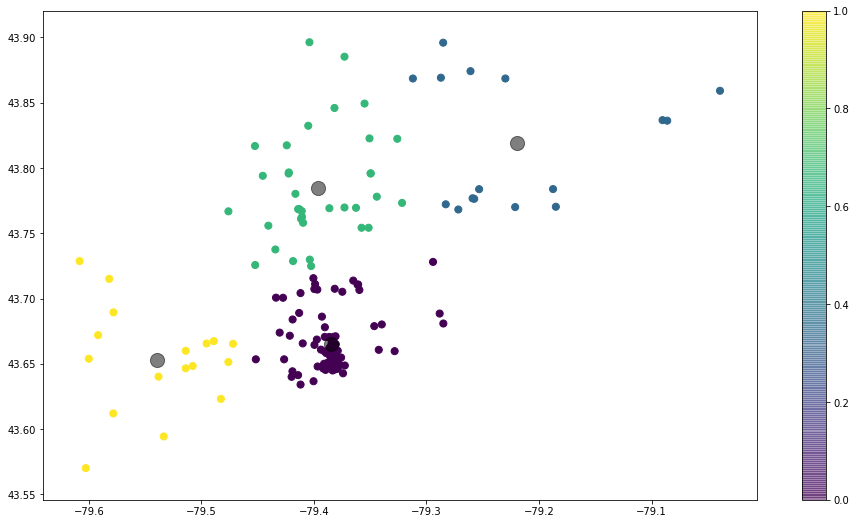

In [136]:
# Latitude - equator=0 to poles=90 (Array 0, first value in coordinate) is represented on graph as Y axis
# Longitude - (Array 1 values, 2nd in pair ) East West, Greenwich, England, is defined as 0° longitude with west longitudes being negative. X axis on graph plot.


plt.figure(figsize=(16,9))
plt.scatter(AllStar[:, 1], AllStar[:, 0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

plt.colorbar();  # show color scale
#plt.gca().invert_yaxis()

In [132]:
print(centers)

[[ 43.66523922 -79.38441197]
 [ 43.81932906 -79.21926814]
 [ 43.78435581 -79.39676533]
 [ 43.65315762 -79.53897282]]


In [133]:
y_kmeans

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

### Predict cluster label for a new coordinate

In [134]:
# Where I want to go:
# Starbucks Reserve Bar
# 1090 Don Mills Rd (at Lawrence Ave)
# Toronto ON M3C 0H1
# Canada
third_test = np.array([43.735977, -79.344265])
third_test = third_test.reshape(1, -1)
third_test_label = kmeans.predict(third_test)
third_test_label

array([2], dtype=int32)

In [ ]:
# Starbucks Reserve Bar is in Cluster 2

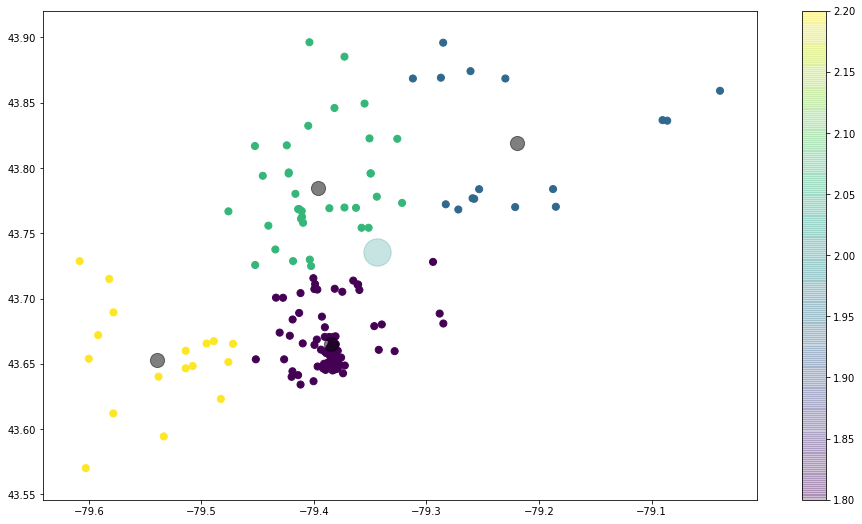

In [137]:

plt.figure(figsize=(16,9))
plt.scatter(AllStar[:, 1], AllStar[:, 0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)
plt.scatter(third_test[:, 1], third_test[:, 0], c=third_test_label, s=750, cmap='viridis', alpha=0.25)

plt.colorbar();  # show color scale

In [ ]:
# Starbucks Reserve Bar highlighted with larger diameter, .25 alpha circle marker.

### Now Display All Starbucks locations color coded by K-Means Cluster

In [138]:
kcolors = ['green', 'orange', 'purple', 'darkblue']

In [139]:
kcolors

['green', 'orange', 'purple', 'darkblue']

In [145]:
#  parse_html=True

latitude = 43.735977
longitude = -79.344265

All_Starbucks_Map = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale=True)


# I can add markers on the map with popup for Postal Code but borough name will not work reliably with variety of 
# characters, such as / . ''. Use folium.Popup with parse_html


        
# Starbucks Green
for i in range(0,len(all_starbucks)):
    folium.Marker([all_starbucks.iloc[i]['lat'], all_starbucks.iloc[i]['lng']],
                  popup=folium.Popup(all_starbucks.iloc[i]['address'], parse_html=True),
                  icon=folium.Icon(color=kcolors[y_kmeans[i]], icon='info-sign')
                  ).add_to(All_Starbucks_Map)   
   
# y_kmeans markers for cluster centers

for i in range(0, len(centers)):
    folium.Marker([centers[i, 0], centers[i, 1]],
             icon=folium.Icon(color='black', icon='info-sign') 
             ).add_to(All_Starbucks_Map)     
    
folium.Marker([third_test[:, 0], third_test[:, 1]],
              popup=folium.Popup('Starbucks Reserve Bar'),
             icon=folium.Icon(color='darkpurple', icon='info-sign') 
             ).add_to(All_Starbucks_Map)     
     
All_Starbucks_Map.save('map_All_Starbucks_Clusters_20200629.html')    
All_Starbucks_Map

### Starbucks locations color coded by K-means cluster it belongs to. Starbucks Reserve Bar icon in dark purple.

<a id='AllStarbucks_KMeans_popDensity'></a>

In [148]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('Neighbourhoods.geojson') as f:
    boundaries_geo = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in boundaries_geo['features']:
    i['id'] = i['properties']['AREA_SHORT_CODE']
    
new_boundaries_geo = boundaries_geo    
    
# load data associated with geo_json

    
# map 43.735977, -79.344265   
map_AllStar_choropleth = folium.Map(location=[43.735977, -79.344265], zoom_start=12)

# choropleth
folium.Choropleth(
    geo_data=new_boundaries_geo,
    name='choropleth',
    data=df,
    columns=['NeighbourhoodNumber','PopulationDensity_per_square_km'],
    # see folium.Choropleth? for details on key_on
    # key_on='feature.id',
    key_on='feature.properties.AREA_SHORT_CODE',
    fill_color='BuPu',
    #threshold_scale=[0, 2, 4, 8, 16, 32],
    #bins=9,
    #bins=[1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 45000],
    bins=[1040, 2853, 3882, 4717, 6300, 7600, 45000],
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_AllStar_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_AllStar_choropleth)




# Starbucks Green
for i in range(0,len(all_starbucks)):
    folium.Marker([all_starbucks.iloc[i]['lat'], all_starbucks.iloc[i]['lng']],
                  popup=folium.Popup(all_starbucks.iloc[i]['address'], parse_html=True),
                  icon=folium.Icon(color=kcolors[y_kmeans[i]], icon='info-sign')
                  ).add_to(map_AllStar_choropleth)   
   
# y_kmeans

for i in range(0, len(centers)):
    folium.Marker([centers[i, 0], centers[i, 1]],
             icon=folium.Icon(color='black', icon='info-sign') 
             ).add_to(map_AllStar_choropleth)     
    
    

# display map
map_AllStar_choropleth.save('map_All_Starbucks_Clusters_PopDensity_20200629.html')
map_AllStar_choropleth

### Starbucks K-Means Clusters marked on Population Density Map for Toronto's Neighbourhoods

[Table of Contents](#table_of_contents)